# Bike Buyers

Dataset link: <https://www.kaggle.com/datasets/heeraldedhia/bike-buyers/>
<br>The goal here is to practice the scikit-learn library.

#### Import libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
%matplotlib inline

#### Load dataset

In [3]:
df = pd.read_csv('data/bike_buyers_clean.csv')
df.drop('ID', axis=1, inplace=True)

In [4]:
df.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Marital Status    1000 non-null   object
 1   Gender            1000 non-null   object
 2   Income            1000 non-null   int64 
 3   Children          1000 non-null   int64 
 4   Education         1000 non-null   object
 5   Occupation        1000 non-null   object
 6   Home Owner        1000 non-null   object
 7   Cars              1000 non-null   int64 
 8   Commute Distance  1000 non-null   object
 9   Region            1000 non-null   object
 10  Age               1000 non-null   int64 
 11  Purchased Bike    1000 non-null   object
dtypes: int64(4), object(8)
memory usage: 93.9+ KB


In [92]:
numeric_variables = df.select_dtypes(include=np.number).columns.to_list()
print(f'numeric variables: {numeric_variables}')

categorical_variables = df.drop('Purchased Bike', axis=1).select_dtypes(include='O').columns.to_list()
print(f'categorical variables: {categorical_variables}')

numeric variables: ['Income', 'Children', 'Cars', 'Age']
categorical variables: ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region']


In [7]:
df[numeric_variables].describe()

,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,56140.000000,1.908000,1.452000,44.190000
std,31081.609779,1.626094,1.124705,11.353537
min,10000.000000,0.000000,0.000000,25.000000
25%,30000.000000,0.000000,1.000000,35.000000
50%,60000.000000,2.000000,1.000000,43.000000
75%,70000.000000,3.000000,2.000000,52.000000
max,170000.000000,5.000000,4.000000,89.000000


In [8]:
def plot_y_pie_chart(value_counts):
    labels = value_counts.index
    values = value_counts.values

    fig, ax = plt.subplots()
    ax.pie(values, labels=labels, autopct='%1.1f%%')    

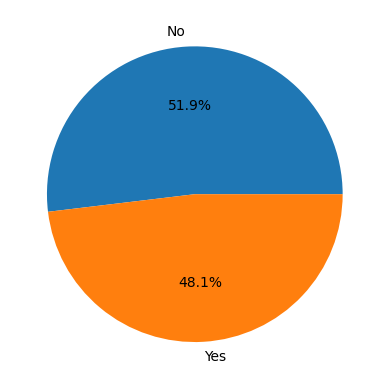

In [9]:
purchaside_bike_counts = df['Purchased Bike'].value_counts()
plot_y_pie_chart(purchaside_bike_counts)


Dataset is well balanced between examples of customers that purchased the bike and those who didn't.

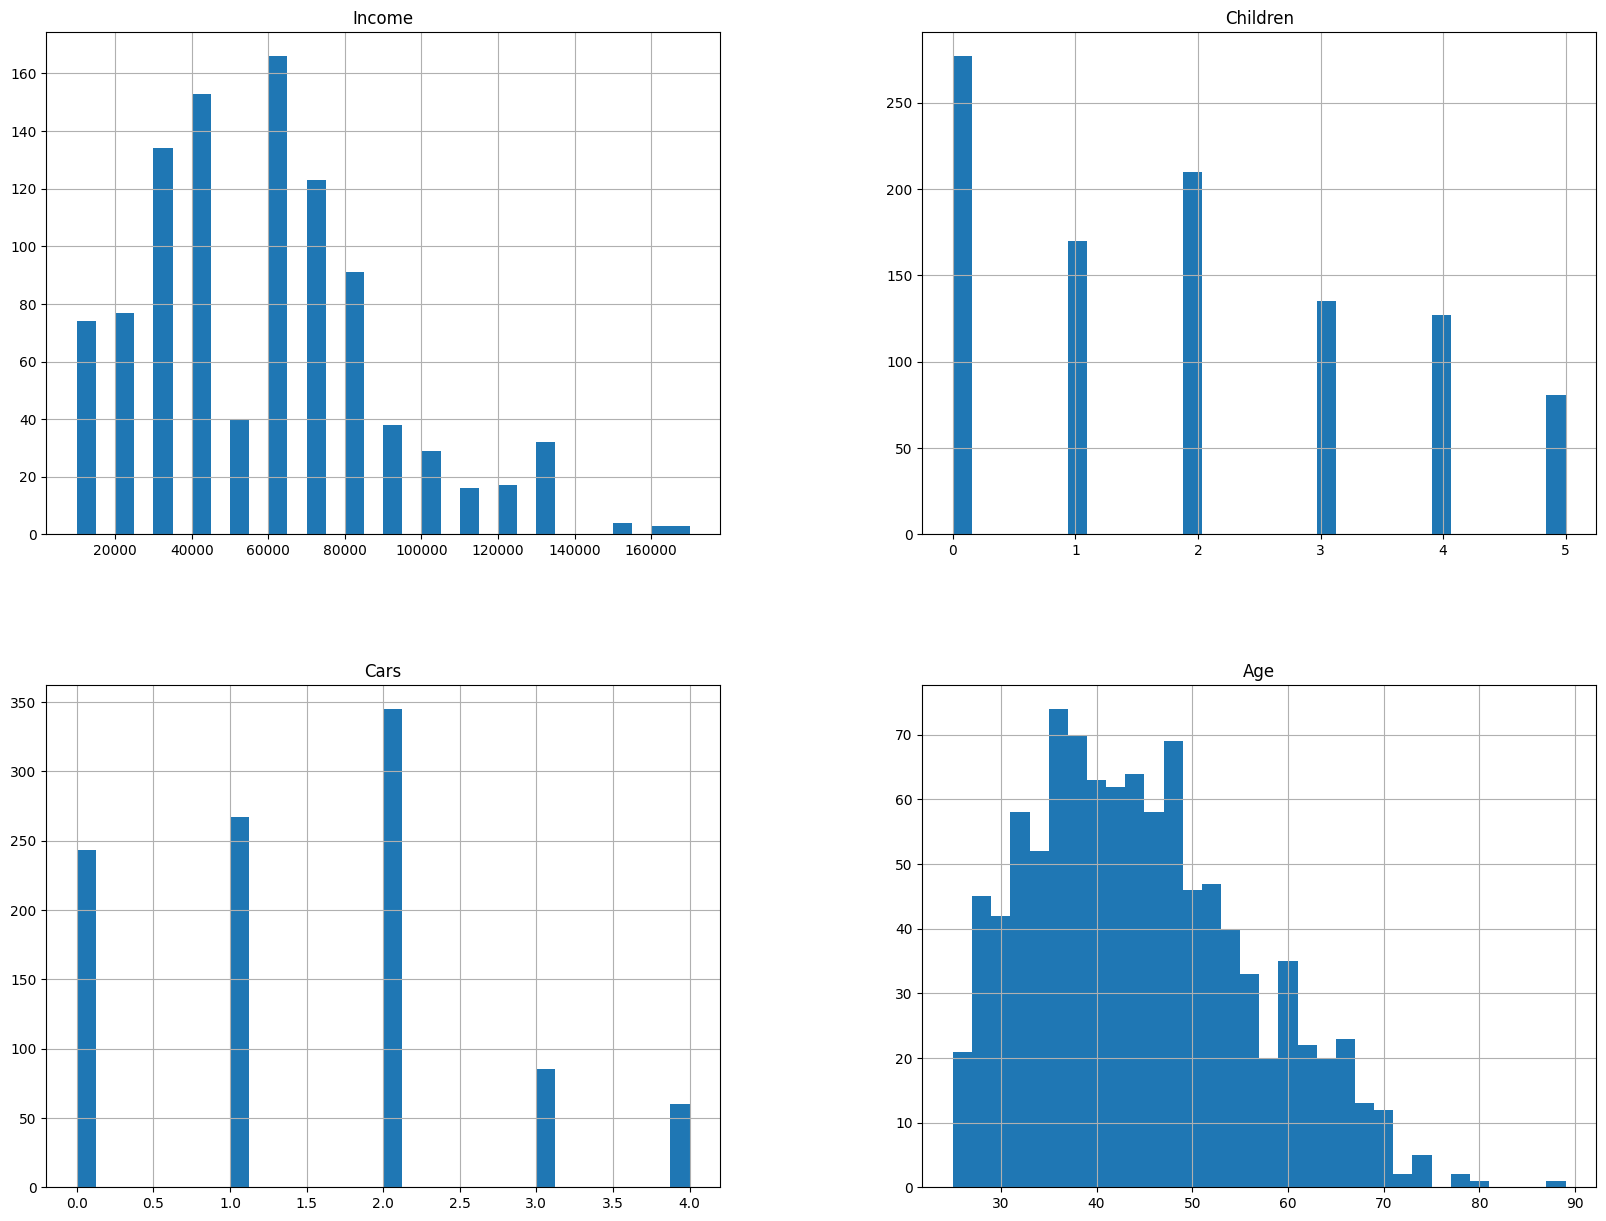

In [10]:
number_of_bins = int(np.sqrt(1000).round())
df[numeric_variables].hist(bins=number_of_bins, figsize=(20,15))
plt.show()

**Aurelien Geron** recommends separating the dataset in the train and test sets right in the beginning to avoid data snooping bias. This is the first time that I hear about this concern and recommended approach. What I understood from his comment in [his book](https://www.amazon.com.br/M%C3%A3os-obra-aprendizado-scikit-learn-tensorflow/dp/8550803812/ref=asc_df_8550803812/?tag=googleshopp00-20&linkCode=df0&hvadid=379748659420&hvpos=&hvnetw=g&hvrand=7233050575186236478&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1001533&hvtargid=pla-812887614657&psc=1&mcid=4ae1075609fa336e931d99bbe1320cb8) and [this page](https://datascience.stanford.edu/news/data-snooping) is that by shuffling and repeating tests too many times, the chances of getting a positive result increases due to the probabilistic nature of the models. By settling with initial train and test datasets, we will avoid getting into the problem of data snooping.

Let's do this:

In [11]:
X = df.drop(['Purchased Bike'], axis=1)
y = df['Purchased Bike']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(f'Number of train examples: {len(X_train)}')
print(f'Number of test examples: {len(X_test)}')

Number of train examples: 800
Number of test examples: 200


#### Let's check the distribution of the y_train:

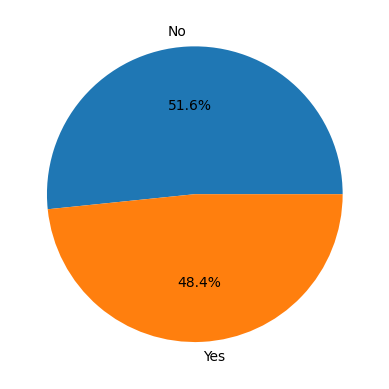

In [14]:
plot_y_pie_chart(y_train.value_counts())

Similar to the complete data.

How is the distribution of the other columns? Do I need to care about the predictors distributions? Does it make sense to apply a stratified approach?

#### Boxplot das variáveis numéricas

In [15]:
# reconstructing the dataframe feels wrong
df_train = X_train.copy()
df_train['Purchased Bike'] = y_train

<Axes: xlabel='Purchased Bike', ylabel='Age'>

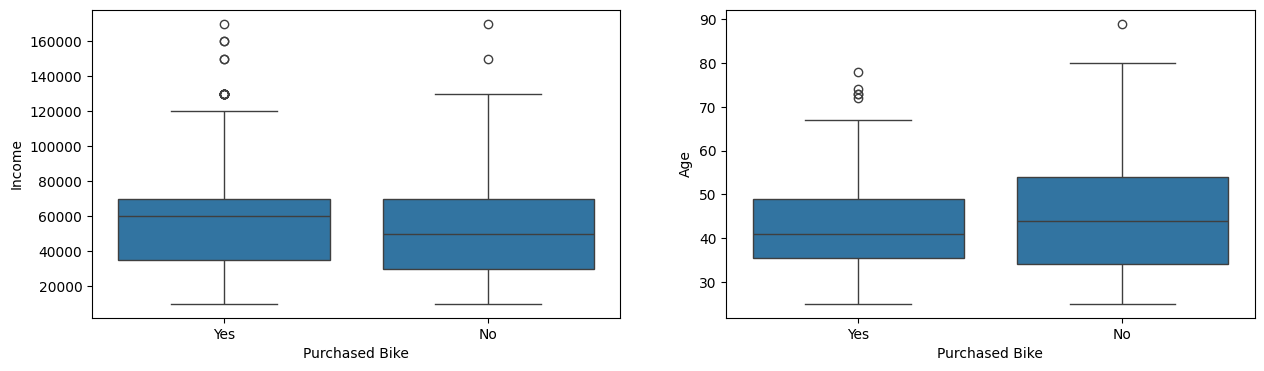

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))
sns.boxplot(ax=axes[0], x='Purchased Bike', y='Income', data=df_train)
sns.boxplot(ax=axes[1], x='Purchased Bike', y='Age', data=df_train)

In [17]:
df_train.groupby(['Purchased Bike'])[numeric_variables].mean()

,Income,Children,Cars,Age
Purchased Bike,,,,
No,54116.22276,2.038741,1.694915,45.198547
Yes,56614.98708,1.640827,1.142119,42.586563


#### Tabulação cruzada com variáveis categóricas

['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike']

In [18]:
pd.crosstab(df_train['Purchased Bike'], df_train['Cars'], normalize='columns')*100

Cars,0,1,2,3,4
Purchased Bike,,,,,
No,35.353535,42.986425,64.444444,61.904762,72.916667
Yes,64.646465,57.013575,35.555556,38.095238,27.083333


In [19]:
pd.crosstab(df_train['Purchased Bike'], df_train['Children'], normalize='columns')*100

Children,0,1,2,3,4,5
Purchased Bike,,,,,,
No,49.356223,41.176471,53.529412,47.222222,55.681818,78.461538
Yes,50.643777,58.823529,46.470588,52.777778,44.318182,21.538462


In [20]:
pd.crosstab(df_train['Purchased Bike'], df_train['Gender'], normalize='columns')*100

Gender,Female,Male
Purchased Bike,,
No,52.956298,50.364964
Yes,47.043702,49.635036


In [21]:
pd.crosstab(df_train['Purchased Bike'], df_train['Marital Status'], normalize='columns')*100

Marital Status,Married,Single
Purchased Bike,,
No,56.705882,45.866667
Yes,43.294118,54.133333


In [22]:
pd.crosstab(df_train['Purchased Bike'], df_train['Education'], normalize='columns')*100

Education,Bachelors,Graduate Degree,High School,Partial College,Partial High School
Purchased Bike,,,,,
No,43.852459,46.099291,57.664234,53.738318,73.4375
Yes,56.147541,53.900709,42.335766,46.261682,26.5625


In [23]:
pd.crosstab(df_train['Purchased Bike'], df_train['Home Owner'], normalize='columns')*100

Home Owner,No,Yes
Purchased Bike,,
No,51.004016,51.905626
Yes,48.995984,48.094374


In [24]:
pd.crosstab(df_train['Purchased Bike'], df_train['Commute Distance'], normalize='columns')*100

Commute Distance,0-1 Miles,1-2 Miles,10+ Miles,2-5 Miles,5-10 Miles
Purchased Bike,,,,,
No,43.478261,53.472222,73.75,44.354839,60.130719
Yes,56.521739,46.527778,26.25,55.645161,39.869281


In [25]:
pd.crosstab(df_train['Purchased Bike'], df_train['Region'], normalize='columns')*100

Region,Europe,North America,Pacific
Purchased Bike,,,
No,50.826446,55.472637,42.948718
Yes,49.173554,44.527363,57.051282


In [26]:
pd.crosstab(df_train['Purchased Bike'], df_train['Occupation'], normalize='columns')*100

Occupation,Clerical,Management,Manual,Professional,Skilled Manual
Purchased Bike,,,,,
No,48.026316,59.398496,56.565657,46.296296,52.5
Yes,51.973684,40.601504,43.434343,53.703704,47.5


#### Combinar atributos

In [27]:
df_train['Income / Family size'] = df_train['Income']/(df_train['Children']+1)

In [28]:
df_train.groupby('Purchased Bike')[['Income / Family size', 'Income']].describe()

Income / Family size                                           \
                              count          mean           std          min   
Purchased Bike                                                                 
No                            413.0  24033.898305  20549.272021  1666.666667   
Yes                           387.0  28673.987941  22756.239778  2000.000000   

                                                    Income               \
                    25%      50%      75%       max  count         mean   
Purchased Bike                                                            
No              10000.0  16000.0  30000.0  130000.0  413.0  54116.22276   
Yes             14000.0  20000.0  38750.0  130000.0  387.0  56614.98708   

                                                                            
                         std      min      25%      50%      75%       max  
Purchased Bike                                                              
No              31430.398576  10000.0  30000.0  50000.0  70000.0  170000.0  
Yes             30397.437898  10000.0  35000.0  60000.0  70000.0  170000.0

<Axes: xlabel='Purchased Bike', ylabel='Income / Family size'>

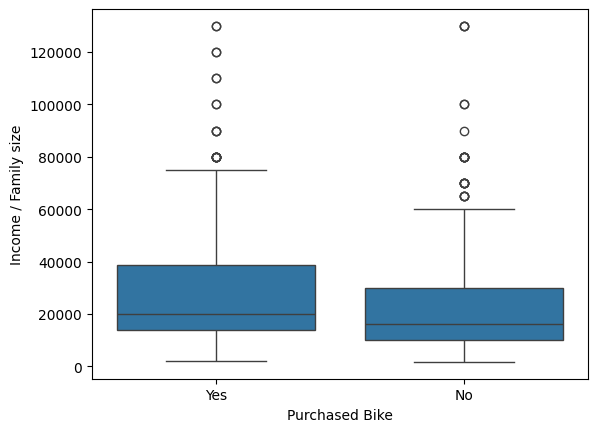

In [29]:
sns.boxplot(x='Purchased Bike', y='Income / Family size', data=df_train)

#### Criar uma classe de transformador para adicionar o atributo combinado que foi criado

In [137]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_income_per_family_size = True):
        self.add_income_per_family_size = add_income_per_family_size

    def fit(self, X, y = None):
        return self # what estimator does it use? why do I have to return self? how can y be None?

    def transform(self, X, y=None):
        income_per_family_size = X['Income']/(X['Children']+1)

        if self.add_income_per_family_size:
            X['Income / Family size'] = income_per_family_size
            return X
        else:
            return X
        
attr_adder = CombinedAttributesAdder()
extra_attribs = attr_adder.transform(df_train[numeric_variables])
extra_attribs.head()

/tmp/ipykernel_12938/851812611.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Income / Family size'] = income_per_family_size


,Income,Children,Cars,Age,Income / Family size
29,20000,0,2,32,20000.000000
535,50000,3,3,41,12500.000000
695,80000,5,2,44,13333.333333
557,40000,3,0,31,10000.000000
836,40000,0,2,28,40000.000000


#### Criando uma pipeline

##### Pipeline numérica

/tmp/ipykernel_12938/851812611.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Income / Family size'] = income_per_family_size


[Text(0.5, 1.0, 'Age Histogram After Standardization')]

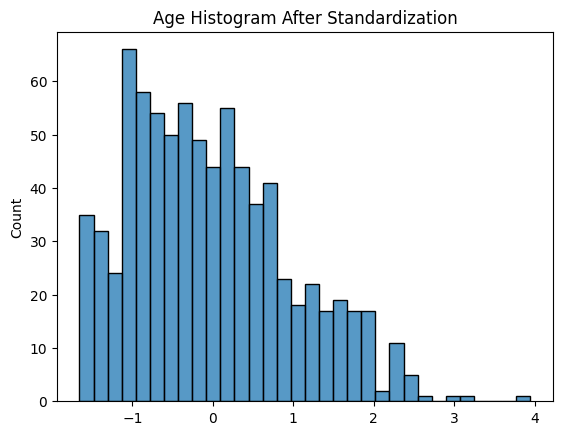

In [148]:
num_pipeline = Pipeline([('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())])

df_train_num_tr = num_pipeline.fit_transform(df_train[numeric_variables])
sns.histplot(df_train_num_tr[:,3], bins=32).set(title='Age Histogram After Standardization')

In [149]:
df_train_num_tr

array([[-1.14240589, -1.14113745,  0.51058229, -1.04518899, -0.28877674],
       [-0.1722098 ,  0.71311433,  1.40242909, -0.25702804, -0.63373352],
       [ 0.79798628,  1.94928219,  0.51058229,  0.00569227, -0.59540499],
       ...,
       [-0.81900719, -1.14113745, -0.38126451, -1.04518899,  0.17116564],
       [-1.46580458,  0.0950304 , -0.38126451,  2.1074548 , -1.05534737],
       [-1.46580458,  0.0950304 , -1.2731113 ,  0.44355947, -1.05534737]])

##### Pipeline integrada com variáveis categóricas

In [131]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numeric_variables),
    ('cat', OneHotEncoder(), categorical_variables)
],
    remainder='passthrough')

df_train_prepared = full_pipeline.fit_transform(df_train)

In [147]:
df_train_prepared[0,:]

array([-1.14240588932211, -1.141137454338863, 0.5105822917676605,
       -1.0451889910584442, -0.28877673823578304, 0.0, 1.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 'Yes', 20000.0], dtype=object)

#### Regressão logística

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [167]:
X_train = full_pipeline.fit_transform(X_train)
X_train[0, :]

array([-1.14240589, -1.14113745,  0.51058229, -1.04518899, -0.28877674,
        0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ])

In [176]:
log_regression = LogisticRegression(random_state=42).fit(X_train, y_train)
log_regression_score = log_regression.score(X_train, y_train)
print('Train score: {:.2%}'.format(log_regression_score))
print(f'Cross validation scores: {cross_val_score(log_regression, X_train, y_train, cv=5)}')
print('Test score: {:.2%}'.format(log_regression.score(full_pipeline.fit_transform(X_test), y_test)))
print('We are a little bit better than tossing a coin.')

Train score: 67.38%
Cross validation scores: [0.625   0.65    0.5625  0.7     0.66875]
Test score: 57.50%
We are a little bit better than tossing a coin.


#### Decision Tree Classifier

In [172]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
decision_tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
decision_tree_score = decision_tree.score(X_train, y_train)
print('Train score: {:.2%}'.format(decision_tree_score))
print(f'Cross validation scores: {cross_val_score(decision_tree, X_train, y_train, cv=5)}')
print('Test score: {:.2%}'.format(decision_tree.score(full_pipeline.fit_transform(X_test), y_test)))

Train score: 99.38%
Cross validation scores: [0.625   0.7     0.625   0.66875 0.66875]
Test score: 62.00%
